In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('Student Mental health.csv')
df2=df.copy()#to save the origional dataframe

In [174]:
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,11/4/2023 2:17,Male,18.0,SM,year 2,6.00 - 6.99,Yes,No,Yes,No
1,11/4/2023 14:20,Male,21.0,MECH,year 2,8.00 - 8.99,No,Yes,No,No
2,11/4/2023 14:21,Male,19.0,MECH,year 2,6.00 - 6.99,Yes,Yes,Yes,No
3,11/4/2023 14:23,Male,22.0,CS,year 3,6.00 - 6.99,Yes,No,No,No
4,11/4/2023 14:27,Male,23.0,CS,year 4,6.00 - 6.99,No,No,No,No
5,11/4/2023 14:27,Male,19.0,SM,Year 2,8.00 - 8.99,No,No,Yes,No
6,11/4/2023 14:30,Male,23.0,ECE,year 2,7.00 - 7.99,Yes,No,Yes,No
7,11/4/2023 14:31,Male,18.0,CS,year 2,7.00 - 7.99,No,Yes,No,No
8,11/4/2023 14:48,Female,19.0,ECE,Year 2,8.00 - 8.99,No,No,No,No
9,11/4/2023 14:54,Male,18.0,ECE,year 2,7.00 - 7.99,No,Yes,Yes,No


In [175]:
#check shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 101 rows and 10 columns.


In [176]:
#datatypes
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [177]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [178]:
#drop time coloumns
df = df.drop('Timestamp', axis=1)


In [179]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Male,18.0,SM,year 2,6.00 - 6.99,Yes,No,Yes,No
1,Male,21.0,MECH,year 2,8.00 - 8.99,No,Yes,No,No
2,Male,19.0,MECH,year 2,6.00 - 6.99,Yes,Yes,Yes,No
3,Male,22.0,CS,year 3,6.00 - 6.99,Yes,No,No,No
4,Male,23.0,CS,year 4,6.00 - 6.99,No,No,No,No


In [180]:
#check for null values
df.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [181]:
#encoding catagorical variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study','Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [182]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,18.0,5,2,6.00 - 6.99,1,0,1,0
1,1,21.0,3,2,8.00 - 8.99,0,1,0,0
2,1,19.0,3,2,6.00 - 6.99,1,1,1,0
3,1,22.0,0,3,6.00 - 6.99,1,0,0,0
4,1,23.0,0,4,6.00 - 6.99,0,0,0,0


In [183]:
#normalize asge values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = ['Age',]  
for column in numerical_columns:
    df[column] = scaler.fit_transform(df[[column]])

In [184]:
df.head(10)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,0.000000,5,2,6.00 - 6.99,1,0,1,0
1,1,0.500000,3,2,8.00 - 8.99,0,1,0,0
2,1,0.166667,3,2,6.00 - 6.99,1,1,1,0
3,1,0.666667,0,3,6.00 - 6.99,1,0,0,0
4,1,0.833333,0,4,6.00 - 6.99,0,0,0,0
5,1,0.166667,5,0,8.00 - 8.99,0,0,1,0
6,1,0.833333,1,2,7.00 - 7.99,1,0,1,0
7,1,0.000000,0,2,7.00 - 7.99,0,1,0,0
8,0,0.166667,1,0,8.00 - 8.99,0,0,0,0
9,1,0.000000,1,2,7.00 - 7.99,0,1,1,0


Exploratory Data Analysis (EDA)

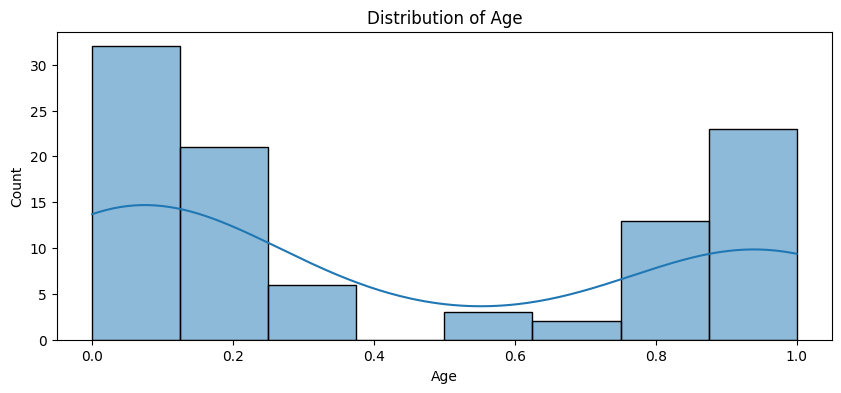

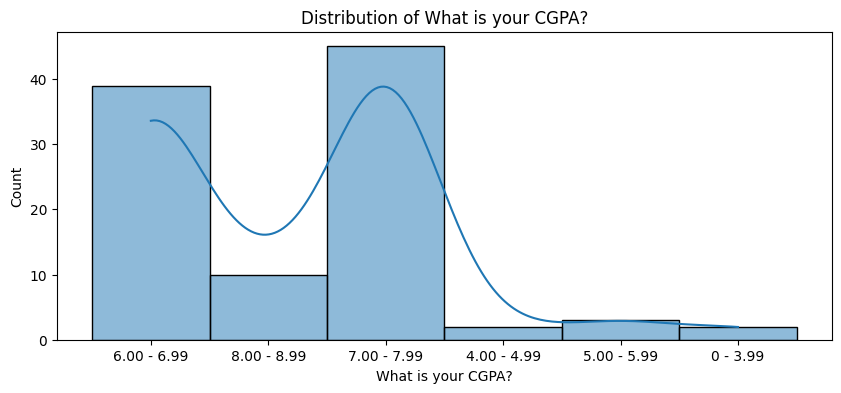

In [185]:
#visualize distribution of numerical values
# Histograms for numerical columns
numerical_columns = ['Age', 'What is your CGPA?']  

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

Visualizing relationships between variables

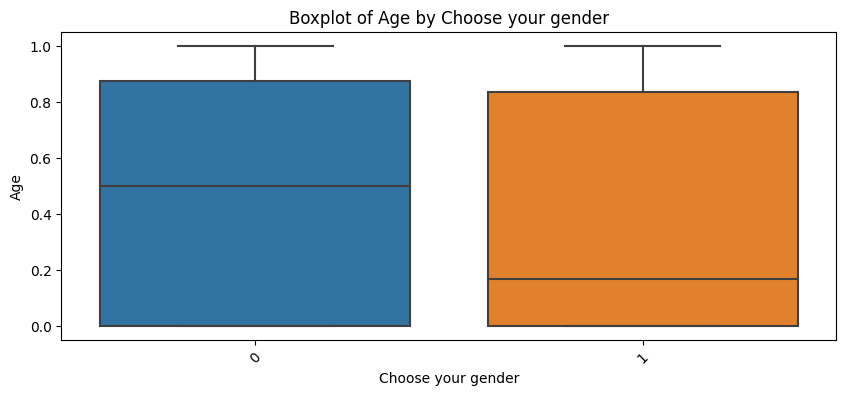

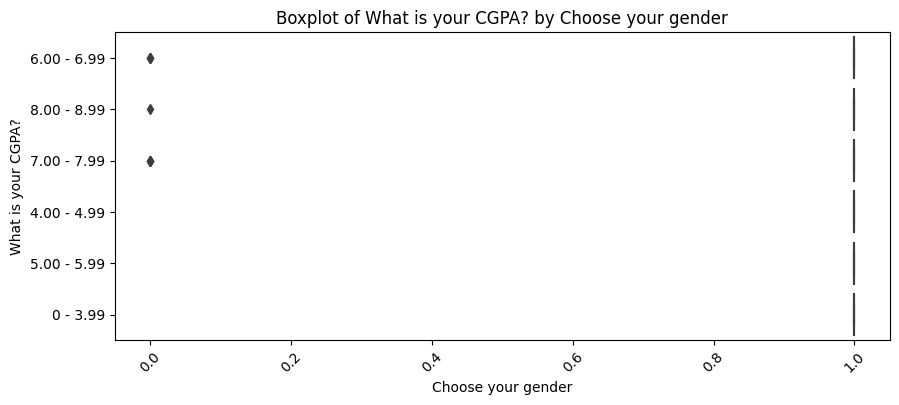

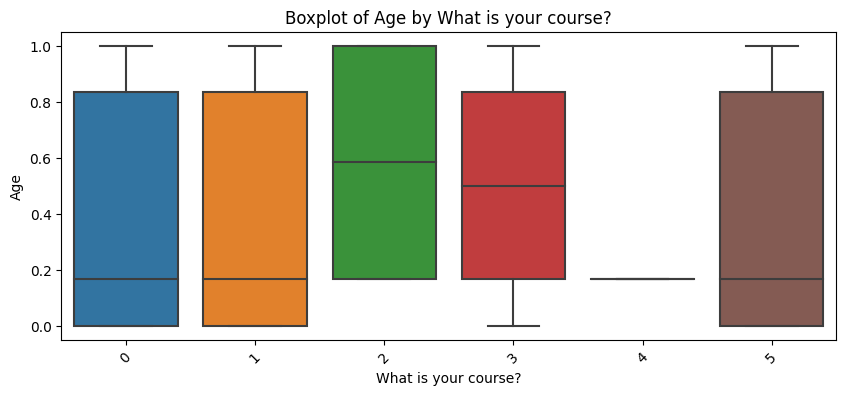

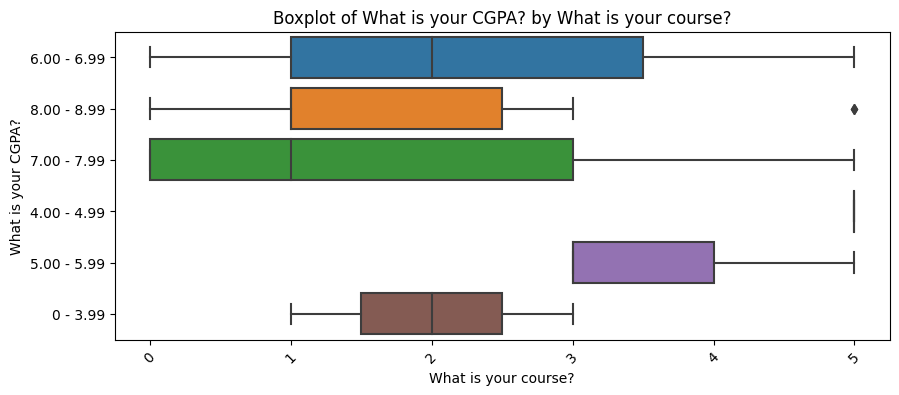

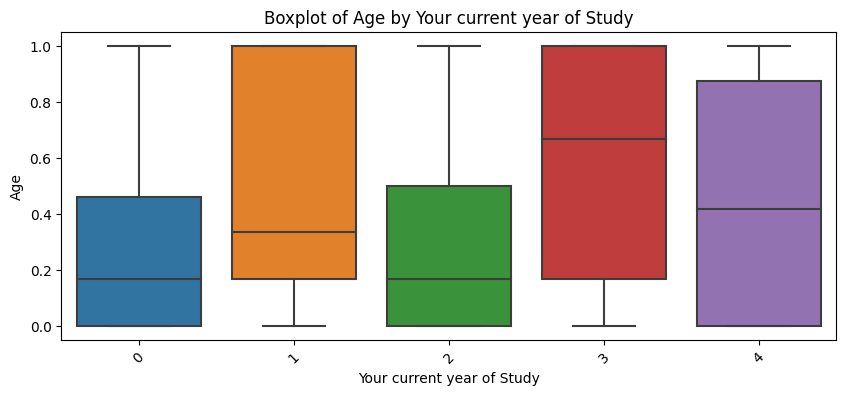

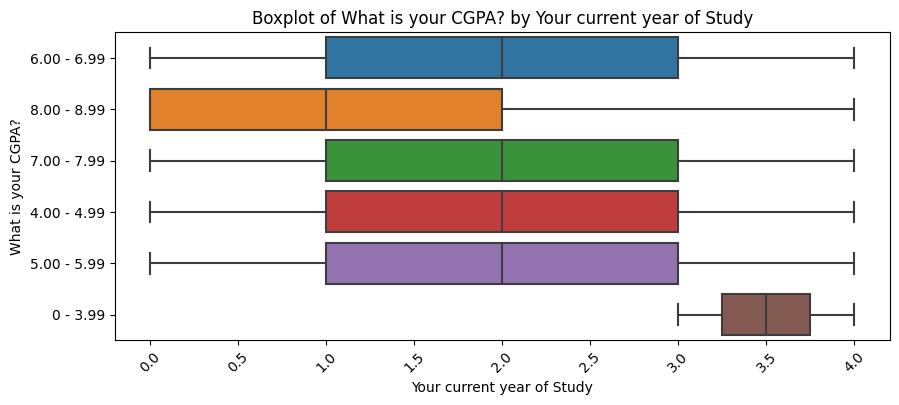

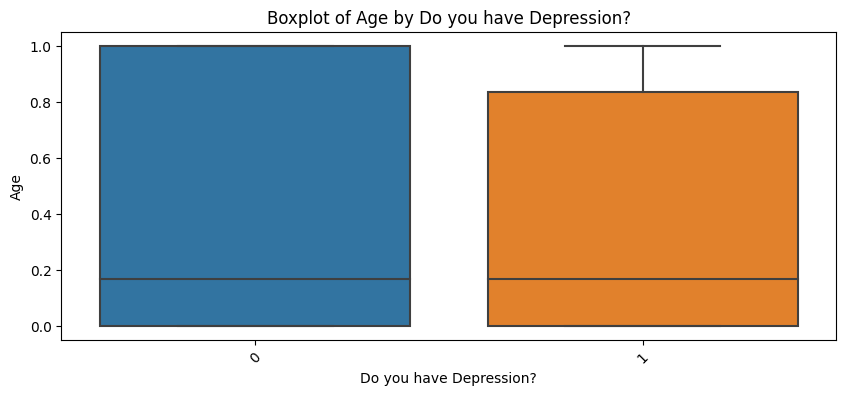

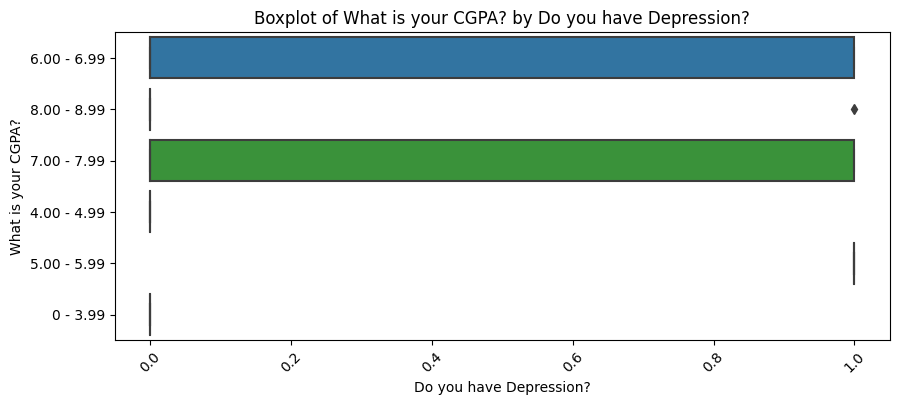

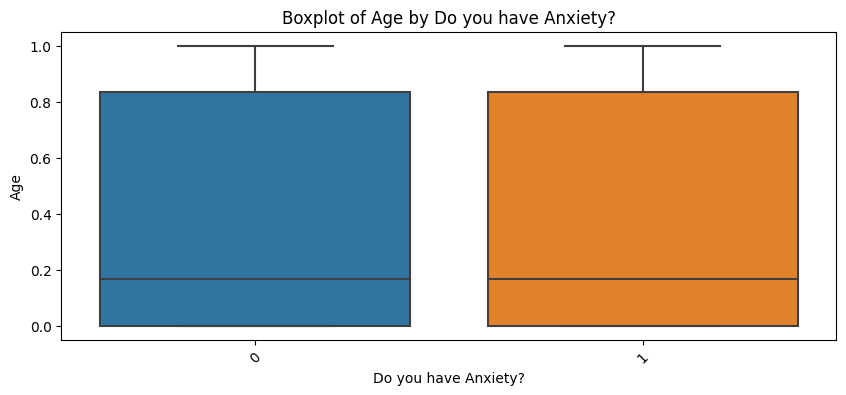

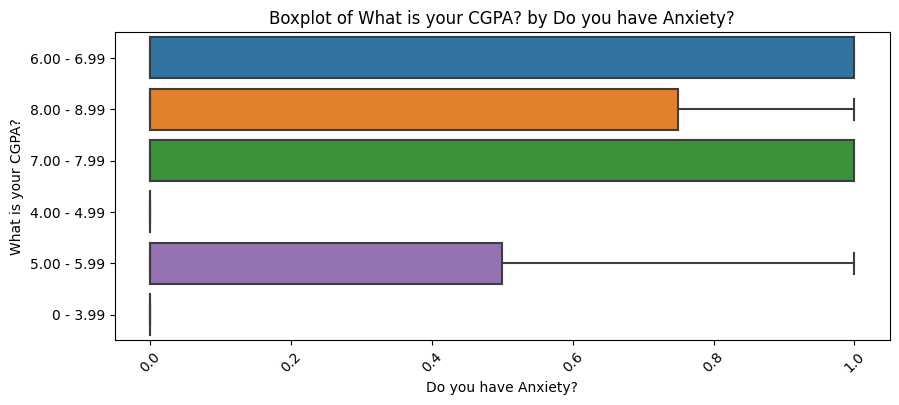

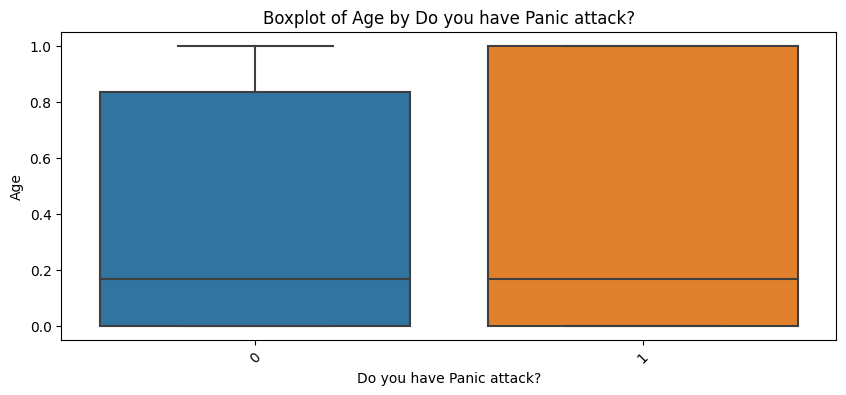

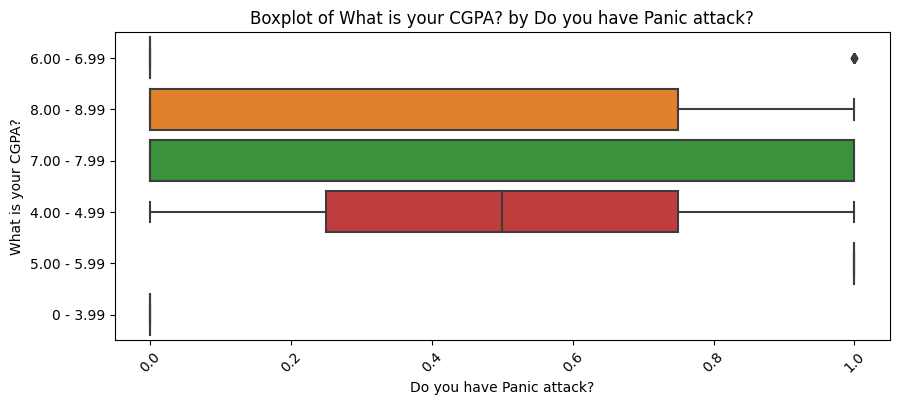

In [186]:
# Boxplots for numerical variables vs categorical variables
categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study',  'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
numerical_columns = ['Age', 'What is your CGPA?']  
for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=df, x=cat_column, y=num_column)
        plt.title(f"Boxplot of {num_column} by {cat_column}")
        plt.xticks(rotation=45)
        plt.show()

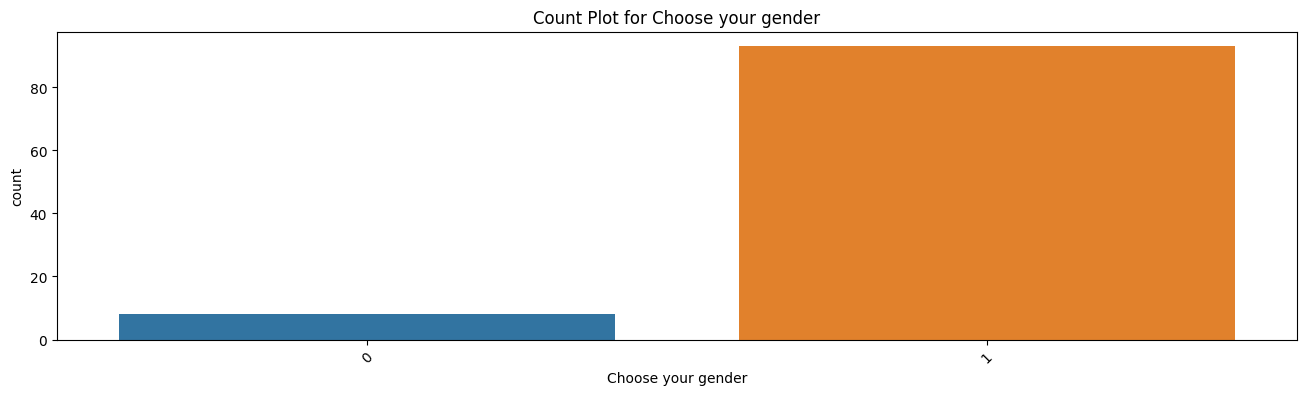

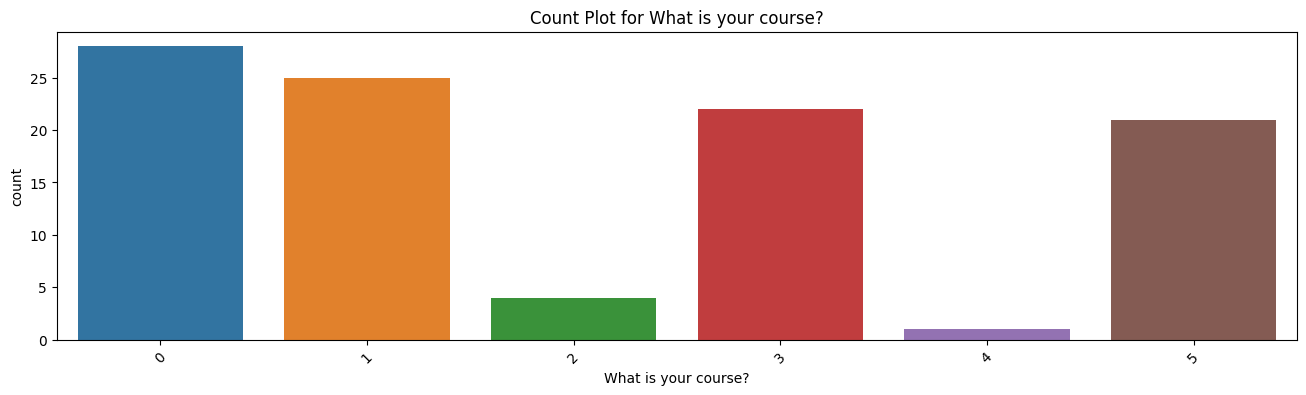

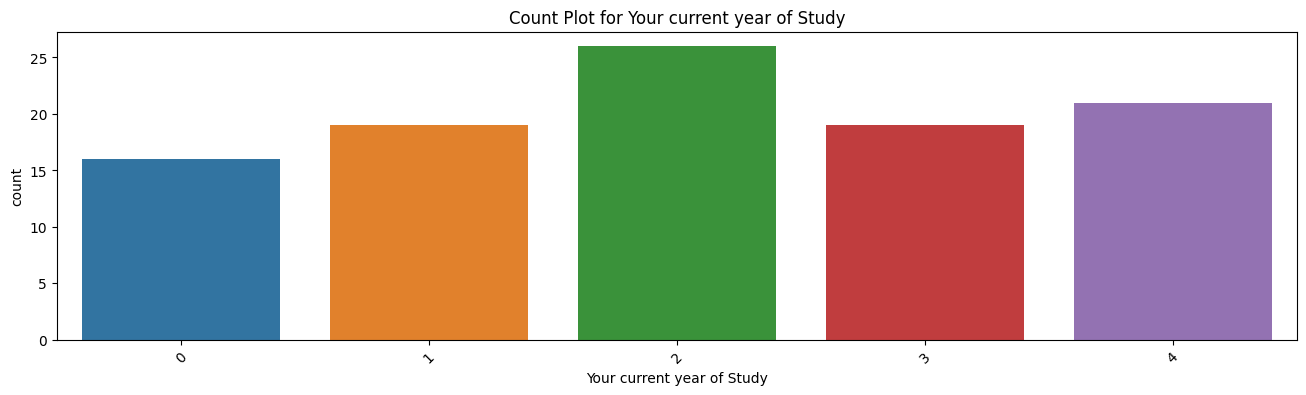

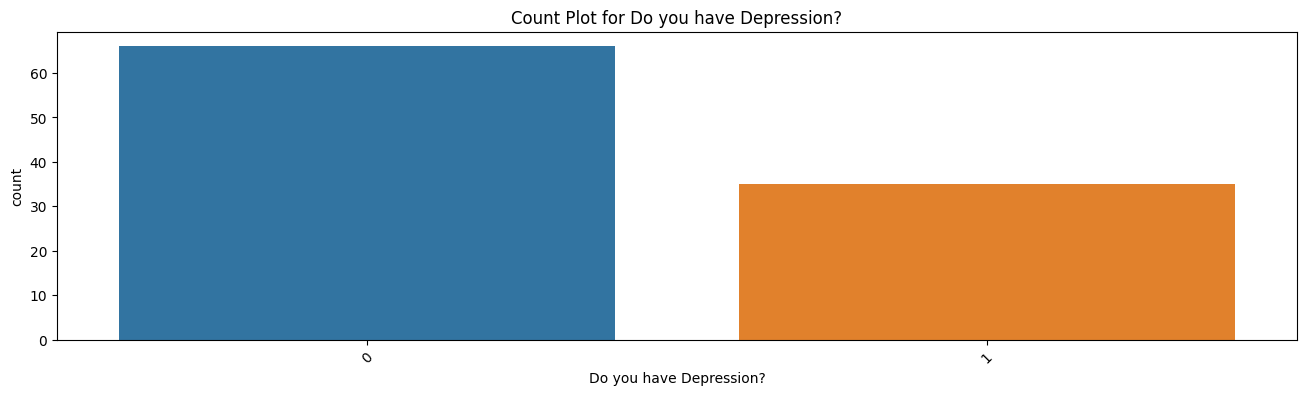

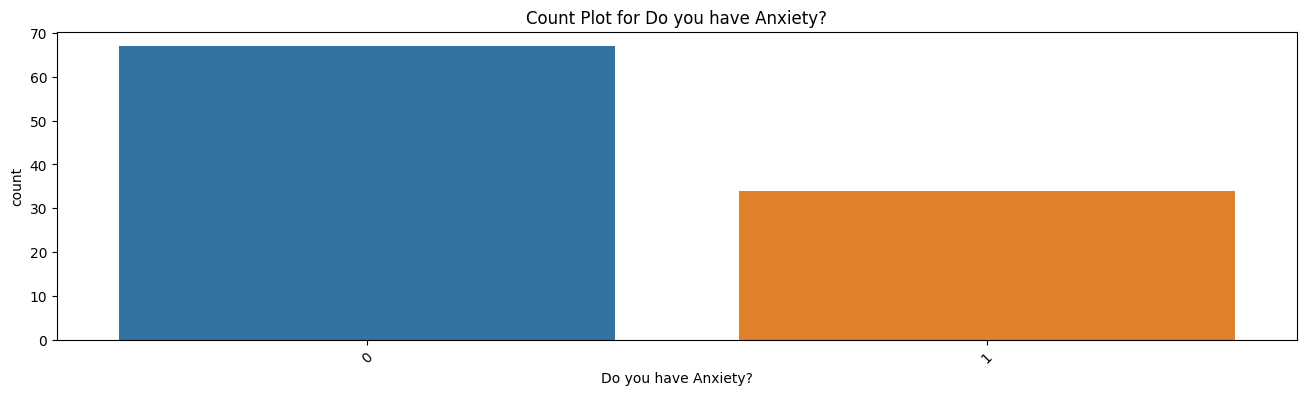

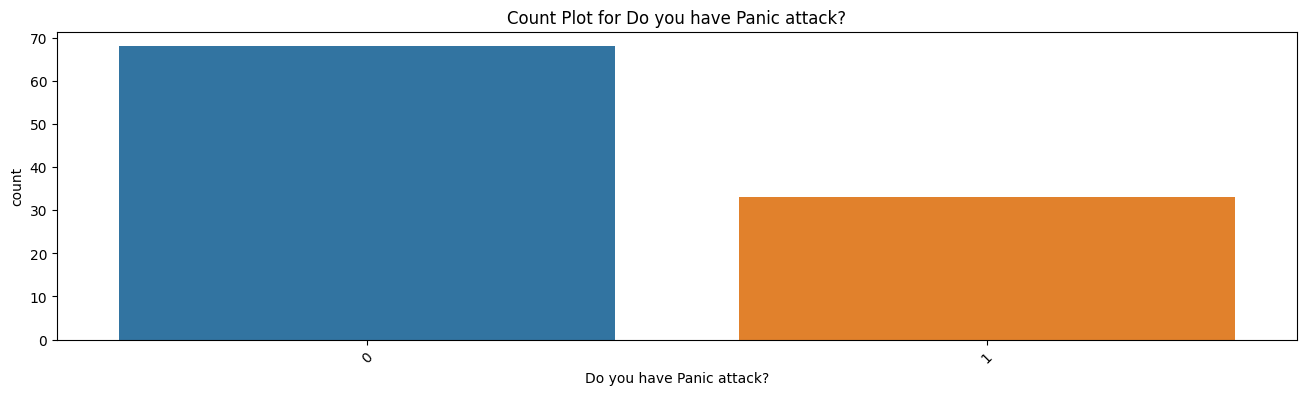

In [187]:
#Count plots for categorical columns
categorical_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study','Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

for column in categorical_columns:
    plt.figure(figsize=(16, 4))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot for {column}")
    plt.xticks(rotation=45)  
    plt.show()

Feature Engineering

In [188]:
# Create a new feature that sums the total number of mental health issues each student has
df['Total Mental Health Issues'] = df['Do you have Depression?'] + df['Do you have Anxiety?'] + df['Do you have Panic attack?']

In [189]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Total Mental Health Issues
0,1,0.000000,5,2,6.00 - 6.99,1,0,1,0,2
1,1,0.500000,3,2,8.00 - 8.99,0,1,0,0,1
2,1,0.166667,3,2,6.00 - 6.99,1,1,1,0,3
3,1,0.666667,0,3,6.00 - 6.99,1,0,0,0,1
4,1,0.833333,0,4,6.00 - 6.99,0,0,0,0,0


In [190]:
#Creating a new feature for CGPA range
df['CGPA Midpoint'] = df['What is your CGPA?'].map({
    '0 - 3.99': 1.995,
    '4.00 - 4.99': 4.495,
    '5.00 - 5.99':5.495,
    '6.00 - 6.99': 6.495,
    '7.00 - 7.99': 7.495,
    '8.00 - 8.99': 8.495,
    '9.00- 10': 9.5,
    
})

df = df.drop('What is your CGPA?', axis=1)

In [191]:
df.head(10)

,Choose your gender,Age,What is your course?,Your current year of Study,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Total Mental Health Issues,CGPA Midpoint
0,1,0.000000,5,2,1,0,1,0,2,6.495
1,1,0.500000,3,2,0,1,0,0,1,8.495
2,1,0.166667,3,2,1,1,1,0,3,6.495
3,1,0.666667,0,3,1,0,0,0,1,6.495
4,1,0.833333,0,4,0,0,0,0,0,6.495
5,1,0.166667,5,0,0,0,1,0,1,8.495
6,1,0.833333,1,2,1,0,1,0,2,7.495
7,1,0.000000,0,2,0,1,0,0,1,7.495
8,0,0.166667,1,0,0,0,0,0,0,8.495
9,1,0.000000,1,2,0,1,1,0,2,7.495


Model selection

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [193]:
# Define feature matrix X and target vector y
X = df.drop('Total Mental Health Issues', axis=1)
y = df['Total Mental Health Issues']

In [194]:
#split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [195]:
#models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

Training

In [196]:
num_cols = ['Age']
cat_cols = ['Choose your gender', 'What is your course?', 'Your current year of Study','Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

In [197]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Impute missing values with the most frequent category for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [198]:
# Impute missing values in the 'CGPA Midpoint' column with the median value
median_value = X_train['CGPA Midpoint'].median()
X_train['CGPA Midpoint'].fillna(median_value, inplace=True)
X_test['CGPA Midpoint'].fillna(median_value, inplace=True)

In [199]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Total Mental Health Issues,CGPA Midpoint
0,1,0.000000,5,2,1,0,1,0,2,6.495
1,1,0.500000,3,2,0,1,0,0,1,8.495
2,1,0.166667,3,2,1,1,1,0,3,6.495
3,1,0.666667,0,3,1,0,0,0,1,6.495
4,1,0.833333,0,4,0,0,0,0,0,6.495


In [200]:
X_train

,Choose your gender,Age,What is your course?,Your current year of Study,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA Midpoint
14,1,0.000000,1,0,0,1,0,0,8.495
48,1,1.000000,0,2,1,0,0,0,6.495
99,1,0.833333,1,4,0,0,0,0,7.495
65,1,0.833333,0,3,1,1,0,0,7.495
61,1,0.166667,0,3,0,0,0,0,7.495
...,...,...,...,...,...,...,...,...,...
52,1,0.166667,1,3,0,0,0,0,6.495
19,1,0.000000,1,2,1,1,1,0,7.495
40,1,1.000000,3,1,0,1,0,0,6.495
98,1,0.166667,2,1,1,0,1,0,7.495


In [201]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

Model evaluation

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [203]:
# Define a function to calculate and print the evaluation metrics
def print_evaluation_metrics(y_test, y_pred, average='micro'):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
    print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=average)}")

In [204]:
# Train the models to evaluate against our random forrest model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


c:\Users\roypu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Gradient Boosting...


In [205]:
# Predict the target variable for the test set using each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    print_evaluation_metrics(y_test, y_pred)
    print("score:",model.score(X_test,y_test))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1 Score: 0.7142857142857143
score: 0.7142857142857143


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
score: 1.0


Model: Random Forest
Accuracy: 0.9523809523809523
Precision: 0.9523809523809523
Recall: 0.9523809523809523
F1 Score: 0.9523809523809523
score: 0.9523809523809523


Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
score: 1.0


